# What is Web Scraping? 

Let’s say, `data is vital` for your company. You are able to see the data on your competitor’s website. The question is how will you download it in a usable format? Most people would be able to only copy and paste it manually. However, it is not feasible to do it for large websites with hundreds of pages. This is where web scraping comes into play.

`Web scraping` is the process of gathering information from the Internet. Even copying and pasting the lyrics of your favorite song is a form of web scraping! However, the words “web scraping” usually refer to a process that involves automation. Some websites don’t like it when automatic scrapers gather their data, while others don’t mind.

If you’re scraping a page respectfully for educational purposes, then you’re unlikely to have any problems. Still, it’s a good idea to do some research on your own and make sure that `you’re not violating any Terms of Service` before you start a large-scale project.

# Web Scraping with Beautiful Soup

Many of your coding projects may require you to pull a bunch of information from an HTML or XML page. This task can be really tedious and boring, that is until you learn how to scrape the web with an HTML Parser! That’s where Beautiful Soup comes in. This Python package allows you to parse HTML and XML pages with ease and pull all sorts of data off the web.

Beautiful Soup is a Python library for pulling data out of HTML and XML files. Beautiful Soup 3 only works on Python 2.x, but Beautiful Soup 4 also works on Python 3.x. Beautiful Soup 4 is faster, has more features, and works with third-party parsers like lxml and html5lib.

Since beautifulsoup used to pull the data out of a HTML, so first we need to pull out the html first. How we do it? We will use default library request.

So all this code is doing is sending a GET request to spesific address we give. This is the same type of request your browser sent to view this page, but the only difference is that Requests can't actually render the HTML, so instead you will just get the raw HTML and the other response information.

# Project : IMDB Most Popular Movies in 2021 

At this project we try to scrap `IMDB most popular movies in 2021` from [IMDB website](https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31). IMDB (Internet Movie Database) is a huge hub of entertainment information. It is the largest, most comprehensive movie database on the web. It offers an extensive database of movie, TV show, and cast information. The site was officially launched in 1990 and is now owned by Amazon.com. `We will try to scrap this sites for educational purpose only.`

### Assignment

Let's say we are in online streaming service business that allows our members to watch TV shows and movies with the most updated content. To serve our loyal customers, we need to consistently bring in new content to our platform. In this case, we need to analyze what movies that worth to be place in our platform, so in the next step we can contact the production house to make a business deal to bring in the movies for our customers. We will analyze the data that we need from this [IMDB website](https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31)

**A. Scrap these data to perform the analysis :**
1. Movie Titles
2. IMDB Rating
3. Metascore
4. Votes

**B. Make a plot of the 7 most popular films of 2021**

### Importing Requirements

Before scraping the website, we need to set up our environment and importing requirements that we need to perform further process :

1. `Set up an empty environment`
```
conda create -n <ENV_NAME> python=<PYTHON_VERSION>
```

2. `Activate the environment`
```
conda activate <ENV_NAME>
```

3. `Navigate path to folder where the file requirements.txt is located,
    You will get the requirements.txt file in the attached folder.`
```
cd <PATH_TO_REQUIREMENTS>
```

4. `Install packages from the file`
```
pip install -r requirements.txt
```
```

`⚠️ Don't forget to install the kernel in that environment if you want it to be accessible using a jupyter notebook`
```
pip install ipykernel
python -m ipykernel install --user --name=<ENV_NAME>
```


### Requests

In order to get the HTML of the website, we need to make a request to get the content of the webpage. Python has a `request` library to get the content. First, we need to import the library and then make a `get()` request to the URL containing the targeted website  

In [1]:
import requests
url = 'https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31'
response = requests.get(url)

In [2]:
#Check response
response

<Response [200]>

The HTTP 200 OK success status response code indicates that the request has succeeded. A 200 response is cacheable by default

To visualize what exactly you get from the request.get, we can use `.content`. In here we slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [3]:
response.content[0:500]

b'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. We can import it by using the line : 

In [4]:
from bs4 import BeautifulSoup 

Then, all we have to do is convert the HTML document to a BeautifulSoup object! There are other options of parser but for our case we will be using `'html.parser'`. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects.

In [5]:
soup = BeautifulSoup(response.content, 'html.parser')
print(soup.prettify()[:500])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime();


### Finding the right key to scrap the data & Extracting the right information

To store the data we need to build some variable that contain empty `list` 

In [6]:
movie_name = []
#year = [] -> not included
time = [] 
rating = []
metascore = []
votes = []

Now we need to find the data that we want to scrap
1. Go to the [IMDB Website](https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31) and perform inspect element
2. Using the inspect element, we found that all the data that we need are stored in 
`<div class="lister-item mode-advanced">`

If we want to find all of the occurrences of a tag, instead of just the first one, we can use `.find_all()`. This function can take in just the name of a tag and returns a list of all occurrences of that tag. With `.find_all()`, we can use regexes, attributes, or even functions to select HTML elements more intelligently. We can pass a dictionary to the `attrs` parameter of `find_all` with the desired attributes of the elements we’re looking for

In [7]:
movie_data = soup.find_all('div', attrs = {'class':'lister-item mode-advanced'})

In [8]:
for store in movie_data:
    #get movie name
    name = store.h3.a.text
    movie_name.append(name)
    
    #get year of release
    #year_of_release = store.h3.find('span', class_= 'lister-item-year text-muted unbold').text.replace('(','').replace(')','')
    #year.append(year_of_release)
    
    #get movie duration
    runtime = store.p.find('span', class_= 'runtime').text.replace(' min', '') if store.p.find('span', class_= 'runtime') else '0'
    time.append(runtime)
    
    #get movie rating
    rate = store.find('div', class_= 'inline-block ratings-imdb-rating').text.replace('\n', '')
    rating.append(rate)
    
    #get metascore
    meta = store.find('span', class_= 'metascore').text if store.find('span', class_= 'metascore') else '0'
    metascore.append(meta)
    
    #get total votes
    total_votes = store.find('span', attrs = {'name': 'nv'}).text
    votes.append(total_votes)

Using `numpy` to make sure the looping result is as expected and not duplicated. While busy writing the code, sometimes you can unconsciously forget that you keep re-run the loop and as a result, the empty list is continuously filled with your re-run loop. In case that you forget and make all the data appended, don't panic. You can just open  the `Kernel` tab above and choose restart & run all.

In [9]:
import numpy as np

In [10]:
np.count_nonzero(movie_name)

50

### Creating data frame & Data wrangling

When we use BeautifulSoup in combination with `pandas`, we can turn websites into DataFrames that are easy to manipulate and gain insights from. We will also need `matplotlib` and `seaborn` to help us visualize the data later

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [12]:
imdb = pd.DataFrame({'Movie Title' : movie_name, 'Duration': time, 'Movie Rating': rating, 'Metascore': metascore, 'Total Votes': votes})

Let's do a bit cleaning so we can do a bit of visualisation. We need to change the "," to " " first. To do this we can use the help of `str.replace()`. Then lastly let's fix all of our data type.

In [13]:
imdb['Total Votes'] = imdb['Total Votes'].str.replace(',','')

In [14]:
imdb['Duration'] = imdb['Duration'].astype('int64')
imdb['Movie Rating'] = imdb['Movie Rating'].astype('float64')
imdb['Metascore'] = imdb['Metascore'].astype('int64')
imdb['Total Votes'] = imdb['Total Votes'].astype('int64')

In [15]:
imdb.dtypes

Movie Title      object
Duration          int64
Movie Rating    float64
Metascore         int64
Total Votes       int64
dtype: object

Make sure there is no empty and duplicated data in your dataset

In [16]:
imdb.isnull().sum()

Movie Title     0
Duration        0
Movie Rating    0
Metascore       0
Total Votes     0
dtype: int64

In [17]:
imdb.duplicated().any()

False

In [18]:
imdb.head(5)

,Movie Title,Duration,Movie Rating,Metascore,Total Votes
0,Don't Look Up,138,7.3,50,288507
1,Spider-Man: No Way Home,148,8.8,71,356532
2,The Matrix Resurrections,148,5.7,63,142757
3,Encanto,102,7.3,76,69143
4,The Book of Boba Fett,38,8.1,0,14526


We need to make a plot of the 7 most popular films of 2021, therefore we can simply use `.head(7)` to collect the top 7 most popular films. The IMDB website already sorted the most popular films, so our result is automatically already turns out as expected without any further modification.

In [19]:
top7_popularity = imdb.head(7).set_index('Movie Title')
top7_popularity 

,Duration,Movie Rating,Metascore,Total Votes
Movie Title,,,,
Don't Look Up,138,7.3,50,288507
Spider-Man: No Way Home,148,8.8,71,356532
The Matrix Resurrections,148,5.7,63,142757
Encanto,102,7.3,76,69143
The Book of Boba Fett,38,8.1,0,14526
1883,60,9.1,0,12309
The Wheel of Time,60,7.3,0,71467


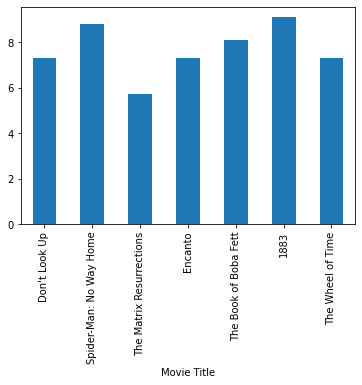

In [20]:
top7_popularity['Movie Rating'].plot(kind = 'bar');

`How to read the graph : (x axis = left -> right | most popular -> least popular)`

The graph above shows that Movie Popularity and Movie Rating do not affect each other. There are several least popular movies like "1883, The book of Boba Fett, Spider-Man No Way Home" that have a higher rating than "Don't Look Up" as the most popular movies. There is also a lower rating movie that more popular than the higher rating one. 

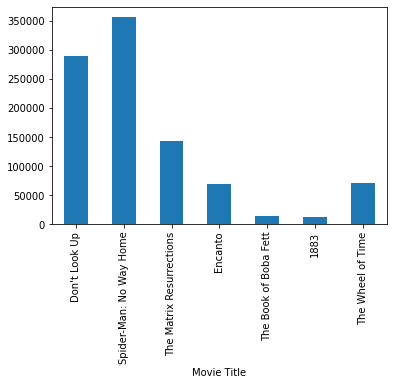

In [21]:
top7_popularity['Total Votes'].plot(kind = 'bar');

`How to read the graph : (x axis = left -> right | most popular -> least popular)`

The graph above shows that Movie Popularity and Total Votes do not affect each other. 

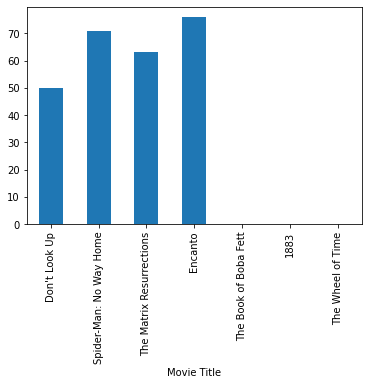

In [22]:
top7_popularity['Metascore'].plot(kind = 'bar');

`How to read the graph : (x axis = left -> right | most popular -> least popular)`

The graph above shows that Movie Popularity and Metascore do not affect each other. 

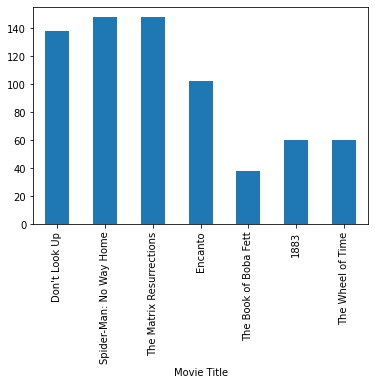

In [23]:
top7_popularity['Duration'].plot(kind = 'bar');

`How to read the graph : (x axis = left -> right | most popular -> least popular)`

The graph above shows that Movie Popularity and Movie Duration (in minutes) do not affect each other. 

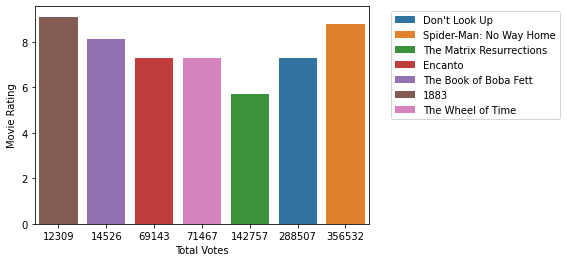

In [24]:
sns.barplot (x = 'Total Votes', y = 'Movie Rating', data=top7_popularity, hue = top7_popularity.index, dodge = False);
plt.legend(bbox_to_anchor = (1.05,1), loc=2);

The graph above shows that Total Votes and Movie Rating have little to no relationship with each other. There are several lower Votes with higher Movie Rating and vice versa.

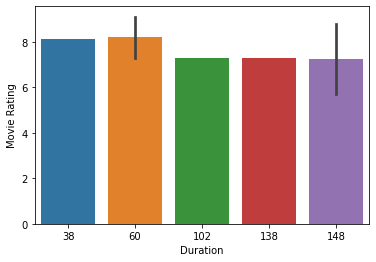

In [25]:
sns.barplot (x = 'Duration', y = 'Movie Rating', data=top7_popularity);

The graph above shows that Movie Duration and Movie Rating have little to no relationship with each other. 

After we try to find some relationships between parameters in the 7 most popular movies in 2021, out of curiosity we want to take a look at other categories outside of the 7 most popular movies. 

In [26]:
top7_duration = imdb.nlargest(7, 'Duration')[['Movie Title', 'Duration']].set_index('Movie Title')
top7_duration

,Duration
Movie Title,
Stay Close,375
Landscapers,193
Pushpa: The Rise - Part 1,179
No Time to Die,163
83,162
Minnal Murali,158
House of Gucci,158


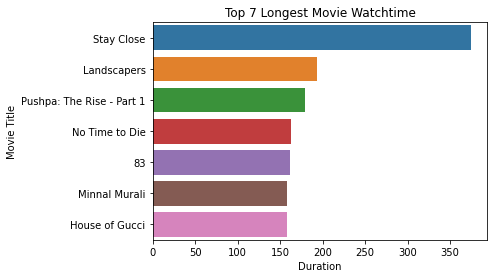

In [27]:
sns.barplot (x = 'Duration', y = top7_duration.index, data=top7_duration);
plt.title("Top 7 Longest Movie Watchtime");

In [28]:
top7_rating = imdb.nlargest(7, 'Movie Rating')[['Movie Title','Movie Rating', 'Total Votes']].set_index('Movie Title')
top7_rating

,Movie Rating,Total Votes
Movie Title,,
Arcane: League of Legends,9.2,127081
1883,9.1,12309
Dexter: New Blood,8.9,39420
Spider-Man: No Way Home,8.8,356532
Dopesick,8.7,28147
Minnal Murali,8.3,18243
Dune: Part One,8.2,430052


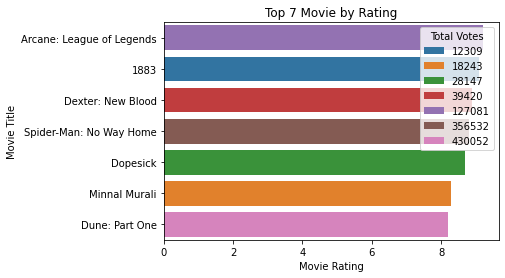

In [29]:
sns.barplot (x = 'Movie Rating', y = top7_rating.index, data=top7_rating, hue = 'Total Votes', dodge = False);
plt.title("Top 7 Movie by Rating");

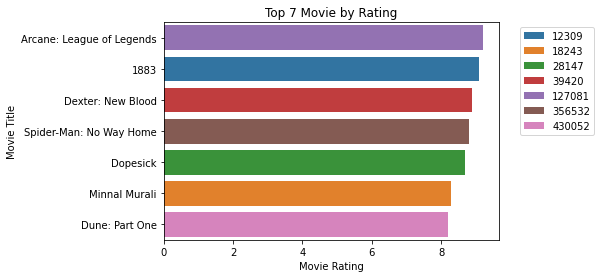

In [30]:
sns.barplot (x = 'Movie Rating', y = top7_rating.index, data=top7_rating, hue = 'Total Votes', dodge = False);
plt.legend(bbox_to_anchor = (1.05,1), loc=2);
plt.title("Top 7 Movie by Rating");

The graph above shows that the most popular movies result is different than the `top7_popularity` if we sorted it out by ranking. Therefore for the most popular movies, IMDB has their own measurement to determine the ranking. 

### Conclusion

1. There are no relationships between the parameters (Duration, Movie Rating, Total Votes, Metascore) and the popularity of the movie
2. IMDB has its own matrix and calculation to determine the most popular movies
3. Both argument is strengthened by the fact that if we sorted the movies by ratings then the most popular movies ranking result will be different (last graph)
4. Top 7 most popular movies in 2021 are :
```
Don't Look Up	
Spider-Man: No Way Home	
The Matrix Resurrections	
Encanto	
The Book of Boba Fett
1883
The Wheel of Time
```
5. Despite having the highest numbers at every parameters, the popularity of "Spider-Man : No Way Home" is still below the "Don't Look Up" movie
6. Despite having the lowest rating, the popularity of "The Matrix Resurrections" is still higher than the other four films that have much better ratings

For further study purposes, we can explore more parameters such as gross value, genre, director, and etc

`Special notes :` to save the data that has been scraped into excel file, please take a look at the code below

In [31]:
#save into excel data (xlsx)
imdb.to_excel("IMDB Popular Movies in 2021.xlsx")